# Actividad 03

Usaremos el conjunto de datos data("marketing") que contiene 200 observaciones de un experimento publicitario que evalúa el impacto de tres medios de anuncio en las ventas. Para cada observación se registran los presupuestos de publicidad (en miles de dólares) y las ventas obtenidas.

## 0. Import Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

## 1. Import Datos

In [2]:
# Carga de datos 

Marketing = pd.read_csv('./marketing_dataset.csv')

Marketing

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


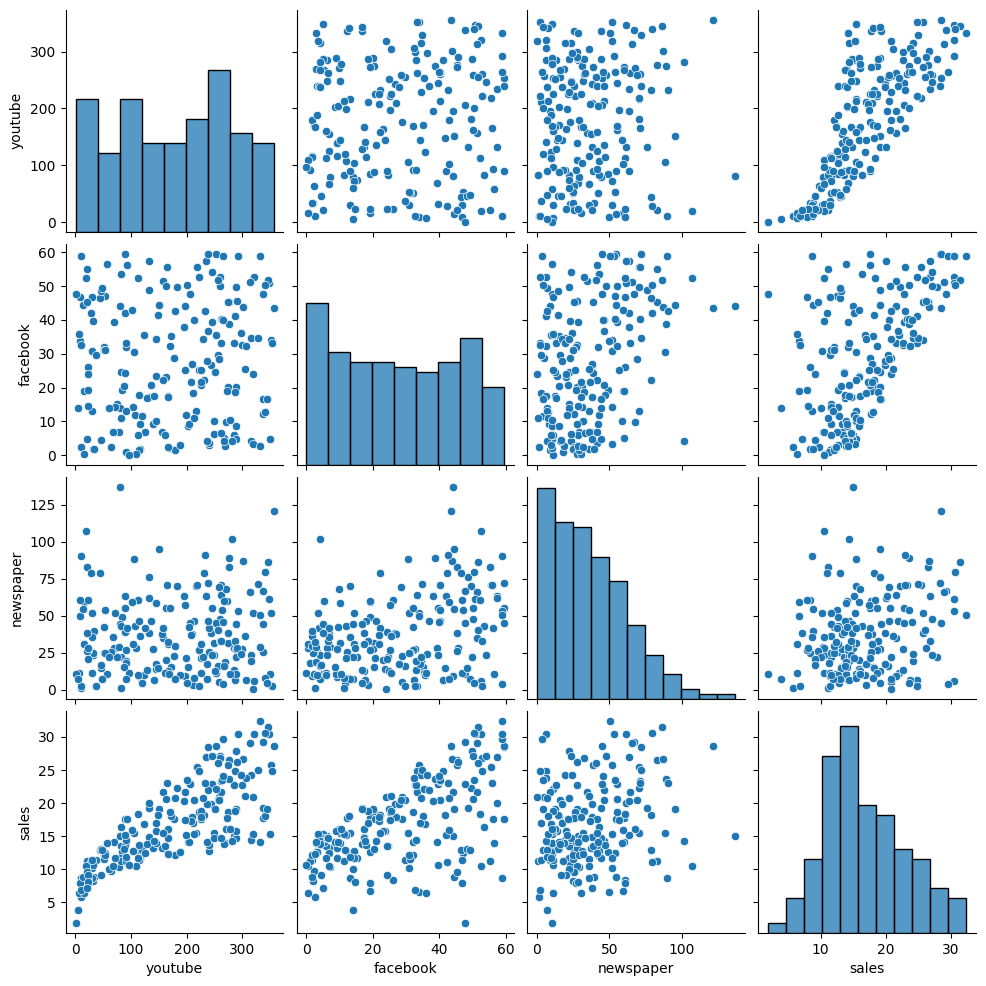

In [3]:
sns.pairplot(Marketing)

## 2. Modelo de Regresión Múltiple

In [6]:
LinearModel_All = smf.ols('sales ~ youtube + facebook + newspaper',Marketing).fit()
LinearModel_All.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        09:09:47   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.000       2.789       4.265
youtube        0.0458      0.001     32.809      0.000       0.043       0.049
facebook       0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
LinearModel_NoNewspaper = smf.ols('sales ~ youtube + facebook',Marketing).fit()
LinearModel_NoNewspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.83e-98
Time:                        09:10:13   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5053      0.353      9.919      0.000       2.808       4.202
youtube        0.0458      0.001     32.909      0.000       0.043       0.048
facebook       0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Prueba de Hipótesis

In [8]:
level_significance = 0.05

### 3.1. Coeficientes de Regresión

In [ ]:
CuadradosMedios_Reg = LinearModel_NoNewspaper.mse_model
CuadradosMedios_Res = LinearModel_NoNewspaper.mse_resid

FValue_0 = CuadradosMedios_Reg/CuadradosMedios_Res
FValue_0

np.float64(859.6177183058211)

In [ ]:
size_n = len(Marketing)
GradosLibertad_Reg = len(LinearModel_NoNewspaper.params) - 1
GradosLibertad_Res = size_n - len(LinearModel_NoNewspaper.params)

FValue_1 = stats.f.ppf(1 - level_significance,GradosLibertad_Reg,GradosLibertad_Res)
FValue_1

(np.float64(3.0417530299846947), 2)

In [29]:
FValue_0 , FValue_1

(np.float64(859.6177183058211), np.float64(3.0417530299846947))

### 3.2. Coeficientes Individuales de Regresión

In [ ]:
DataX = np.concat(
    [np.ones((size_n,1)),
     Marketing[['youtube','facebook']].to_numpy()],
    axis=1,
)
EstimateSquareSigma = LinearModel_NoNewspaper.mse_resid

CovarianceEstimateBetas = EstimateSquareSigma*np.linalg.inv(DataX.T@DataX)

In [68]:
tValue_1 = stats.t.ppf(1-level_significance/2,size_n-len(LinearModel_NoNewspaper.params))

for index_feature , (feature,beta_value) in enumerate(LinearModel_NoNewspaper.params[1:].items(),1):
    tValue_0 = beta_value / np.sqrt(CovarianceEstimateBetas[index_feature,index_feature])
    print(f'{feature} :: {tValue_0}')

print(f't_1 :: {tValue_1}')

youtube :: 32.90870826061355
facebook :: 23.382446009649577
t_1 :: 1.9720790337760217
